<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task_5__Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **LOAD DATA**

In [4]:
df = pd.read_csv("heart.csv")   # change filename if needed
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [6]:
# Features & target

In [5]:

X = df.drop("target", axis=1)
y = df["target"]

# **SPLIT DATA**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **DECISION TREE CLASSIFIER**

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [9]:
# Decision Tree Accuracy

In [10]:
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [11]:
# Visualize the tree

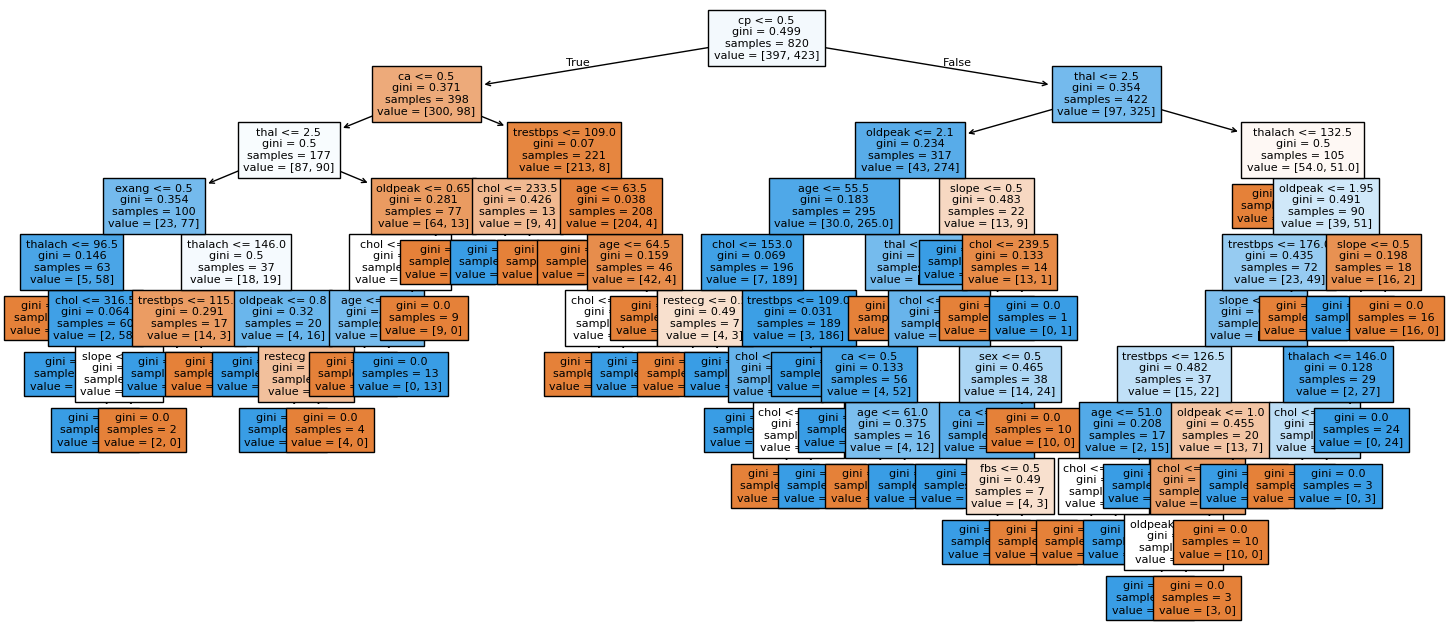

In [12]:
plt.figure(figsize=(18,8))
plot_tree(dt, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

# **HANDLING OVERFITTING (CONTROL TREE DEPTH)**

In [13]:
dt_pruned = DecisionTreeClassifier(
    max_depth=4,     # limit depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [14]:
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [16]:
# Pruned Decision Tree Accuracy

In [17]:
y_pred_pruned = dt_pruned.predict(X_test)
print("\nPruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Decision Tree Accuracy: 0.7951219512195122


# RANDOM FOREST **CLASSIFIER**

In [18]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_pred_rf = rf.predict(X_test)

In [20]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **FEATURE IMPORTANCE**

In [21]:
importances = rf.feature_importances_
feature_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [22]:
print("\nFeature Importance:\n", feature_imp)


Feature Importance:
      Feature  Importance
2         cp    0.136494
11        ca    0.123180
12      thal    0.122048
7    thalach    0.119684
9    oldpeak    0.117045
0        age    0.079199
4       chol    0.078098
3   trestbps    0.069589
8      exang    0.055335
10     slope    0.043412
1        sex    0.028806
6    restecg    0.018946
5        fbs    0.008162


In [23]:
# Plot feature importance

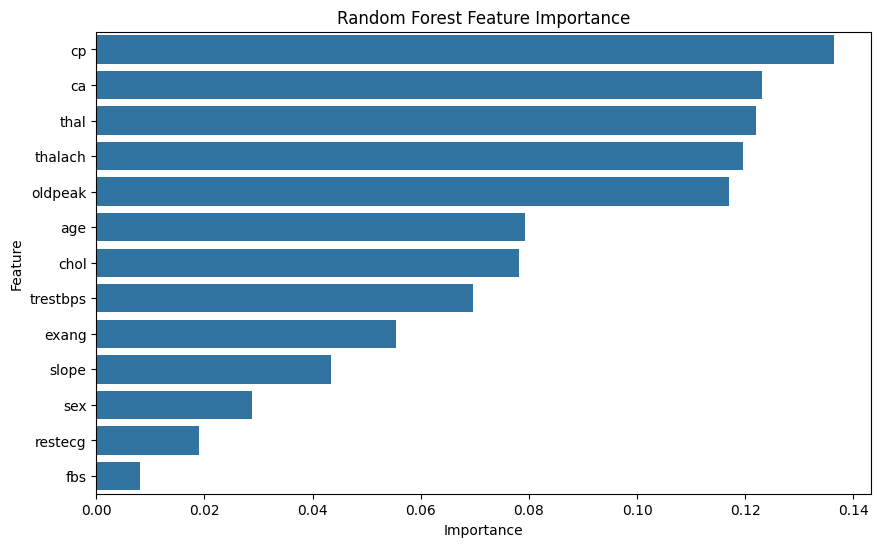

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_imp)
plt.title("Random Forest Feature Importance")
plt.show()

# **CROSS VALIDATION**

In [25]:
scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", scores)
print("Average CV Score:", scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Average CV Score: 0.9970731707317073
